<a href="https://colab.research.google.com/github/DiboraHaile/TTS_amhairc/blob/main/preprocessing_stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
# import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import IPython.display as ipd
from nltk.tokenize import RegexpTokenizer
from nltk.text import Text
import re
from wordcloud import WordCloud
import seaborn as sn

In [ ]:
def check_dir():
  if os.getcwd() != '/content/drive/MyDrive':
    os.chdir('/content/drive/MyDrive')

# Analyze the transcription text
This class will contain functions for analyzing and preprocessing the transcription text that will be input to the tacotron model. The functions will include symbolize, len_words, len_characters, feature_distr, etc

In [ ]:
class Analyze_data():
    def __init__(self,text):
        assert isinstance(text, list)
        symb = 'ሀ 	ሁ 	ሂ 	ሃ 	ሄ 	ህ 	ሆ ለ 	ሉ 	ሊ 	ላ 	ሌ 	ል 	ሎ ሏ	ሐ 	ሑ 	ሒ 	ሓ 	ሔ 	ሕ 	ሖ  ሗ	መ 	ሙ 	ሚ 	ማ 	ሜ 	ም 	ሞ ሟ ሠ 	ሡ 	ሢ 	ሣ 	ሤ 	ሥ 	ሦ 	ሧ  ረ 	ሩ 	ሪ 	ራ 	ሬ 	ር 	ሮ 	ሯ ሰ 	ሱ 	ሲ 	ሳ 	ሴ 	ስ 	ሶ 	ሷ ሸ 	ሹ 	ሺ 	ሻ 	ሼ 	ሽ 	ሾ 	ሿ  	ቀ 	ቁ 	ቂ 	ቃ 	ቄ 	ቅ 	ቆ 	ቈ 	ቊ 	ቋ 	ቌ 	ቍ በ 	ቡ 	ቢ 	ባ 	ቤ 	ብ 	ቦ 	ቧ ቨ 	ቩ 	ቪ 	ቫ 	ቬ 	ቭ 	ቮ 	ቯ  ተ 	ቱ 	ቲ 	ታ 	ቴ 	ት 	ቶ 	ቷ 	ቸ 	ቹ 	ቺ 	ቻ 	ቼ 	ች 	ቾ 	ቿ 	ኀ 	ኁ 	ኂ 	ኃ 	ኄ 	ኅ 	ኆ 	ኈ 	ኊ 	ኋ 	ኌ 	ኍ  	ነ 	ኑ 	ኒ 	ና 	ኔ 	ን 	ኖ 	ኗ 	ኘ 	ኙ 	ኚ 	ኛ 	ኜ 	ኝ 	ኞ 	ኟ	አ 	ኡ 	ኢ 	ኣ 	ኤ 	እ 	ኦ 	ኧ 	ከ 	ኩ 	ኪ 	ካ 	ኬ 	ክ 	ኮ 	ኰ 	ኲ 	ኳ 	ኴ 	ኵ  	ኸ 	ኹ 	ኺ 	ኻ 	ኼ 	ኽ 	ኾ 	ዀ 	ዂ 	ዃ 	ዄ 	ዅ ወ 	ዉ 	ዊ 	ዋ 	ዌ 	ው 	ዎ ዐ 	ዑ 	ዒ 	ዓ 	ዔ 	ዕ 	ዖ ዘ 	ዙ 	ዚ 	ዛ 	ዜ 	ዝ 	ዞ ዟ ዠ 	ዡ 	ዢ 	ዣ 	ዤ 	ዥ 	ዦ 	ዧ 	የ 	ዩ 	ዪ 	ያ 	ዬ 	ይ 	ዮ 	ደ 	ዱ 	ዲ 	ዳ 	ዴ 	ድ 	ዶ 	ዷ 	ጀ 	ጁ 	ጂ 	ጃ 	ጄ 	ጅ 	ጆ 	 ጇ 	ገ 	ጉ 	ጊ 	ጋ 	ጌ 	ግ 	ጎ 	ጐ 	ጒ 	ጓ 	ጔ 	ጕ ጠ 	ጡ 	ጢ 	ጣ 	ጤ 	ጥ 	ጦ 	 ጧ 	ጨ 	ጩ 	ጪ 	ጫ 	ጬ 	ጭ 	ጮ 	ጯ ጰ 	ጱ 	ጲ 	ጳ 	ጴ 	ጵ 	ጶ	ጷ	ጸ 	ጹ 	ጺ 	ጻ 	ጼ 	ጽ 	ጾ 	ጿ ፀ 	ፁ 	ፂ 	ፃ 	ፄ 	ፅ 	ፆ ፈ 	ፉ 	ፊ 	ፋ 	ፌ 	ፍ 	ፎ 	ፏ 	ፐ 	ፑ 	ፒ 	ፓ 	ፔ 	ፕ 	ፖ ፗ '
        tokenizer1 = RegexpTokenizer("[\u1200-\u135A]+")
        self.dictionary = tokenizer1.tokenize(symb)

        text_str = ""
        for sentence in text:
          text_str += sentence
        self.text = text_str

    
    def symbolize(self):
        symbol_dict = {i:self.dictionary[i] for i in range(len(self.dictionary))}
        for symb_in_doc in self.text:
            if symb_in_doc not in symbol_dict.values():
                symbol_dict[len(symbol_dict)] = symb_in_doc
        return symbol_dict
  
    def count_words(self):        
        tokenizer = RegexpTokenizer("[\u1200-\u135A]+")
        tokenized = tokenizer.tokenize(self.text)
        count_dict ={}
        for token in tokenized:
            if token not in count_dict.keys():
                count_dict[token] = 1
            else:
                count_dict[token] += 1
        return count_dict
       
    
    def count_letters(self):        
        unique_letters = self.symbolize()
        count_dict = {unique_letters[i]:0 for i in range(len(unique_letters))}
        for letter_in_doc in self.text:
            if letter_in_doc not in count_dict.keys():
                count_dict[letter_in_doc] = 1
            else:
                count_dict[letter_in_doc] += 1
        return count_dict
    
    def word_cloud(self):
        # df=pd.DataFrame(,columns=['a','b','c','d','e','f','g'])
        sn.heatmap(df)
        plt.imshow(wordcloud,interpolation='bilinear')
    

In [ ]:
#testing data analyzer
Data_analysis = Analyze_data(Data.df_text)
Data_analysis.count_letters()

{' ': 12817,
 '(': 19,
 ')': 19,
 ',': 6,
 '.': 315,
 '/': 1,
 '0': 175,
 '1': 307,
 '2': 111,
 '3': 109,
 '4': 80,
 '5': 115,
 '6': 99,
 '7': 99,
 '8': 111,
 '9': 119,
 '?': 11,
 'a': 8,
 'b': 2,
 'c': 2,
 'd': 1,
 'e': 7,
 'h': 3,
 'i': 6,
 'l': 4,
 'm': 2,
 'n': 6,
 'o': 4,
 'p': 2,
 'q': 1,
 'r': 4,
 's': 6,
 't': 5,
 'w': 1,
 'y': 1,
 'z': 1,
 '~': 5,
 '«': 37,
 '»': 33,
 'ሀ': 11,
 'ሁ': 183,
 'ሂ': 20,
 'ሃ': 78,
 'ሄ': 55,
 'ህ': 267,
 'ሆ': 246,
 'ለ': 1174,
 'ሉ': 385,
 'ሊ': 212,
 'ላ': 710,
 'ሌ': 106,
 'ል': 1105,
 'ሎ': 146,
 'ሏ': 15,
 'ሐ': 102,
 'ሑ': 7,
 'ሒ': 2,
 'ሓ': 0,
 'ሔ': 17,
 'ሕ': 92,
 'ሖ': 0,
 'ሗ': 0,
 'መ': 1208,
 'ሙ': 104,
 'ሚ': 587,
 'ማ': 515,
 'ሜ': 168,
 'ም': 1084,
 'ሞ': 211,
 'ሟ': 10,
 'ሠ': 167,
 'ሡ': 22,
 'ሢ': 0,
 'ሣ': 77,
 'ሤ': 0,
 'ሥ': 169,
 'ሦ': 23,
 'ሧ': 0,
 'ረ': 558,
 'ሩ': 354,
 'ሪ': 342,
 'ራ': 551,
 'ሬ': 120,
 'ር': 1504,
 'ሮ': 174,
 'ሯ': 3,
 'ሰ': 534,
 'ሱ': 83,
 'ሲ': 238,
 'ሳ': 403,
 'ሴ': 81,
 'ስ': 1346,
 'ሶ': 41,
 'ሷ': 5,
 'ሸ': 64,
 'ሹ': 11,
 'ሺ': 47,
 'ሻ': 122,
 'ሼ

# Custom Dataset
This class will contain functions that will retrieve audio and text from the given dataframe. These functions include get_data and getitem for now.


In [ ]:
# DEFAULT_SAMPLE_RATE = 22050

class Amh_Dataset(Dataset):
    def __init__(self, path, transform=None):
        df = pd.read_csv(path+"/"+path+".csv")
        # recordings = librosa.util.find_files("./")

        assert isinstance(df, pd.DataFrame)
        assert len(df.columns) == 2

        self.df_text = df['text'].tolist()
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        transcription, path = self.df.iloc[index]

        if self.transform is not None:
            transcription = self.transform(transcription)

        return {'transcription': transcription, 'path':path}
    
    def display_data(self, index):
        transcription, path = self.df.iloc[index]
        print(path)
        audio,sr = librosa.load(path)
        print(transcription)

        # plot the time series
        plt.plot(audio);
        plt.title('Signal');
        plt.xlabel('Time (samples)');
        plt.ylabel('Amplitude');
        #play the sound
        return ipd.Audio(path)

    def display_stat(self):
        analyzer = Analyze_data(self.df_text)
        symbol_dict = analyzer.symbolize()
        word_count = analyzer.count_words()
        letter_count = analyzer.count_letters()
        return symbol_dict,word_count,letter_count


Official_longer_sent/RECS/0001/0001item0583.wav
ሚስቶቻቸውም የሚኖሩት እያንዳንዳቸው በየራሳቸው ቤት ለየብቻቸው ነው።


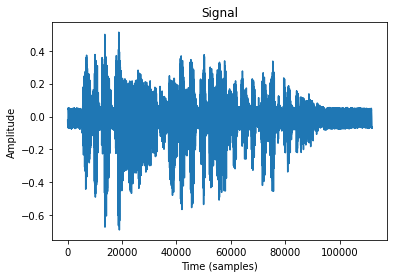

In [ ]:
#testing dataset class
check_dir()
Data = Amh_Dataset("Official_longer_sent")
Data.__getitem__(100)
Data.display_data(100)

['ሀ',
 'ሁ',
 'ሂ',
 'ሃ',
 'ሄ',
 'ህ',
 'ሆ',
 'ለ',
 'ሉ',
 'ሊ',
 'ላ',
 'ሌ',
 'ል',
 'ሎ',
 'ሏ',
 'ሐ',
 'ሑ',
 'ሒ',
 'ሓ',
 'ሔ',
 'ሕ',
 'ሖ',
 'ሗ',
 'መ',
 'ሙ',
 'ሚ',
 'ማ',
 'ሜ',
 'ም',
 'ሞ',
 'ሟ',
 'ሠ',
 'ሡ',
 'ሢ',
 'ሣ',
 'ሤ',
 'ሥ',
 'ሦ',
 'ሧ',
 'ረ',
 'ሩ',
 'ሪ',
 'ራ',
 'ሬ',
 'ር',
 'ሮ',
 'ሯ',
 'ሰ',
 'ሱ',
 'ሲ',
 'ሳ',
 'ሴ',
 'ስ',
 'ሶ',
 'ሷ',
 'ሸ',
 'ሹ',
 'ሺ',
 'ሻ',
 'ሼ',
 'ሽ',
 'ሾ',
 'ሿ',
 'ቀ',
 'ቁ',
 'ቂ',
 'ቃ',
 'ቄ',
 'ቅ',
 'ቆ',
 'ቈ',
 'ቊ',
 'ቋ',
 'ቌ',
 'ቍ',
 'በ',
 'ቡ',
 'ቢ',
 'ባ',
 'ቤ',
 'ብ',
 'ቦ',
 'ቧ',
 'ቨ',
 'ቩ',
 'ቪ',
 'ቫ',
 'ቬ',
 'ቭ',
 'ቮ',
 'ቯ',
 'ተ',
 'ቱ',
 'ቲ',
 'ታ',
 'ቴ',
 'ት',
 'ቶ',
 'ቷ',
 'ቸ',
 'ቹ',
 'ቺ',
 'ቻ',
 'ቼ',
 'ች',
 'ቾ',
 'ቿ',
 'ኀ',
 'ኁ',
 'ኂ',
 'ኃ',
 'ኄ',
 'ኅ',
 'ኆ',
 'ኈ',
 'ኊ',
 'ኋ',
 'ኌ',
 'ኍ',
 'ነ',
 'ኑ',
 'ኒ',
 'ና',
 'ኔ',
 'ን',
 'ኖ',
 'ኗ',
 'ኘ',
 'ኙ',
 'ኚ',
 'ኛ',
 'ኜ',
 'ኝ',
 'ኞ',
 'ኟ',
 'አ',
 'ኡ',
 'ኢ',
 'ኣ',
 'ኤ',
 'እ',
 'ኦ',
 'ኧ',
 'ከ',
 'ኩ',
 'ኪ',
 'ካ',
 'ኬ',
 'ክ',
 'ኮ',
 'ኰ',
 'ኲ',
 'ኳ',
 'ኴ',
 'ኵ',
 'ኸ',
 'ኹ',
 'ኺ',
 'ኻ',
 'ኼ',
 'ኽ',
 'ኾ',
 'ዀ',
 'ዂ',
 'ዃ',
 'ዄ',
 'ዅ'

In [ ]:
word_count

13977

In [ ]:
letter_count

{'ሀ': 11,
 'ሁ': 183,
 'ሂ': 20,
 'ሃ': 78,
 'ሄ': 55,
 'ህ': 267,
 'ሆ': 246,
 'ለ': 1174,
 'ሉ': 385,
 'ሊ': 212,
 'ላ': 710,
 'ሌ': 106,
 'ል': 1105,
 'ሎ': 146,
 'ሏ': 15,
 'ሐ': 102,
 'ሑ': 7,
 'ሒ': 2,
 'ሔ': 17,
 'ሕ': 92,
 'መ': 1208,
 'ሙ': 104,
 'ሚ': 587,
 'ማ': 515,
 'ሜ': 168,
 'ም': 1084,
 'ሞ': 211,
 'ሟ': 10,
 'ሠ': 167,
 'ሡ': 22,
 'ሣ': 77,
 'ሥ': 169,
 'ሦ': 23,
 'ረ': 558,
 'ሩ': 354,
 'ሪ': 342,
 'ራ': 551,
 'ሬ': 120,
 'ር': 1504,
 'ሮ': 174,
 'ሯ': 3,
 'ሰ': 534,
 'ሱ': 83,
 'ሲ': 238,
 'ሳ': 403,
 'ሴ': 81,
 'ስ': 1346,
 'ሶ': 41,
 'ሷ': 5,
 'ሸ': 64,
 'ሹ': 11,
 'ሺ': 47,
 'ሻ': 122,
 'ሼ': 1,
 'ሽ': 117,
 'ሾ': 21,
 'ቀ': 371,
 'ቁ': 100,
 'ቂ': 53,
 'ቃ': 107,
 'ቄ': 7,
 'ቅ': 231,
 'ቆ': 109,
 'ቋ': 42,
 'በ': 2314,
 'ቡ': 97,
 'ቢ': 114,
 'ባ': 520,
 'ቤ': 151,
 'ብ': 598,
 'ቦ': 109,
 'ቧ': 11,
 'ቨ': 12,
 'ቪ': 13,
 'ቫ': 23,
 'ቬ': 5,
 'ቭ': 2,
 'ቮ': 8,
 'ተ': 1046,
 'ቱ': 278,
 'ቲ': 95,
 'ታ': 508,
 'ቴ': 50,
 'ት': 1922,
 'ቶ': 248,
 'ቷ': 28,
 'ቸ': 483,
 'ቹ': 70,
 'ቺ': 26,
 'ቻ': 141,
 'ቼ': 13,
 'ች': 621,
 'ቾ': 9,
 'ኁ': 1,
 'ኃ': 27,
